In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import spacy

In [154]:
#df=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv')
#df.to_csv('ufo.csv')

df=pd.read_csv('ufo.csv')
df['Shape Reported']=df['Shape Reported'].astype('category')
df['Colors Reported']=df['Colors Reported'].astype('category')
#df['State']=df['State'].astype('category')
df['Time']=pd.to_datetime(df['Time'])
#df.plot()
df=df.dropna()

le=LabelEncoder()
df['State_enc_le']=le.fit_transform(df['State'])
df=df[df.State.notnull()]
df.reset_index()
#print(df['State_enc_le'])
print(df.columns)
print(df.shape)
print(df.dtypes)
#print(df.index)


Index(['Unnamed: 0', 'City', 'Colors Reported', 'Shape Reported', 'State',
       'Time', 'State_enc_le'],
      dtype='object')
(15510, 7)
Unnamed: 0                  int64
City                       object
Colors Reported          category
Shape Reported           category
State                      object
Time               datetime64[ns]
State_enc_le                int32
dtype: object


In [147]:
ufo_no_missing = df[df["Colors Reported"].notnull() & 
          df["State"].notnull() & 
          df["Shape Reported"].notnull()]

# Print out the shape of the new dataset
print(ufo_no_missing.shape)


(15510, 7)


In [148]:
print(df.var())

Unnamed: 0      5.339361e+08
State_enc_le    2.321981e+02
dtype: float64


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:3774: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if legend and (hue is not None) and (hue not in [x, row, col]):


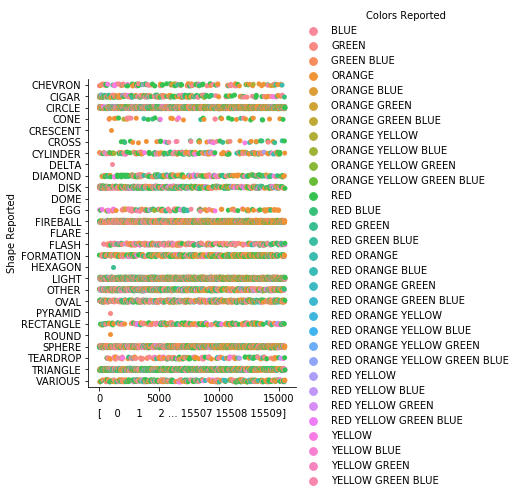

In [123]:
x=np.arange(len(df))
g = sns.catplot(x=x, y="Shape Reported", hue="Colors Reported", data=df, height=5)


Dataset Time range min=1939-06-30 20:00:00 max=2014-09-05 03:43:00


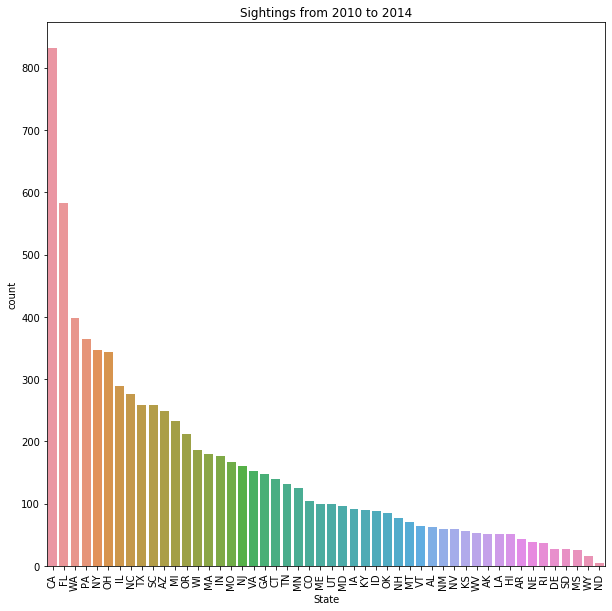

In [124]:
print("Dataset Time range min={} max={}".format(np.min(df['Time']), np.max(df['Time'])))
fig,ax=plt.subplots(figsize=(10,10))
filter=(df['Time']>='2010-01-01') &(df['Time']<='2014-10-01')
state=df[filter]['State']
plt.xticks(rotation=90)
plt.title('Sightings from 2010 to 2014')
sns.countplot(state,order = state.value_counts().index)

In [129]:
#X=pd.get_dummies(df['Shape Reported'])
#second=pd.Series(df['Colors Reported'].cat.codes)
X=df[['Shape Reported','Colors Reported']].apply(lambda x: x.cat.codes)
y=df['State_enc_le']
#print(df['State_enc_le'])

print(len(X),len(y))


15510 15510


0.08884590586718247


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238B9E441C8>,
      dtype=object)

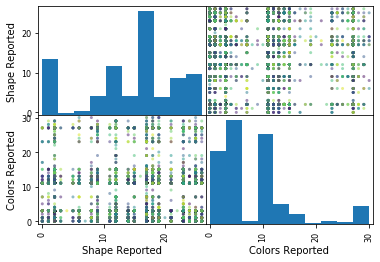

In [130]:
X_train,y_train, X_test,y_test = train_test_split(X,y,test_size=0.3, random_state=21)

knn=KNeighborsClassifier(algorithm='auto', leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=6,p=2,weights='uniform')
#knn=KNeighborsClassifier()

#knn=KNeighborsClassifier()

#print(len(X),X)
#for item in X.iterrows():
#    print(item)

ss=StandardScaler()
X_normalized=ss.fit_transform(X)
knn.fit(X_normalized, y)
print(knn.score(X_normalized,y))
pd.plotting.scatter_matrix(X,c=y)

[0.5242649 0.4757351]


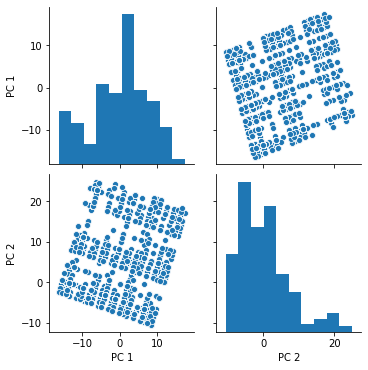

There exists a 8% accuracy for predict the state using the shape and color of the sighting


In [141]:
X=df[['Shape Reported','Colors Reported']].apply(lambda x: x.cat.codes)
y=df['State_enc_le']

pca=PCA()
transformed_X=pca.fit_transform(X)
print(pca.explained_variance_ratio_)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y)

# Fit knn to the training data
knn.fit(X_train,y_train)

# Score knn on the test data and print it out
knn.score(X_test,y_test)

pc_df = pd.DataFrame(transformed_X, columns=['PC 1', 'PC 2'])

sns.pairplot(data=pc_df)
plt.show()

print('There exists a 8% accuracy for predict the state using the shape and color of the sighting')


In [6]:
#ufo_df=pd.read_csv("https://raw.githubusercontent.com/underthecurve/ufo-sightings/master/ufo.csv")
#ufo_df.to_csv("ufo-with-descriptions.csv")
#ufo_df=pd.read_csv("ufo-with-descriptions.csv")
ufo_df=pd.read_csv("ufo_id_ut.csv")
#print(ufo_df['state'].unique())

#filter=ufo_df['state'].isin(['UT','ID'])
#ufo_df=ufo_df[filter]
#ufo_df=ufo_df.dropna()
#print(ufo_df.shape)
#print(ufo_df['state'].unique())
#print(ufo_df.columns)
#ufo_df['state_idaho']=ufo_df["state"].apply(lambda x: 1 if x=='ID' else 0)
#ufo_df['state_utah']=ufo_df["state"].apply(lambda x: 1 if x=='UT' else 0)

#shape_set= pd.get_dummies(ufo_df['shape'])

#ufo_df = pd.concat([ufo_df, shape_set], axis=1)

#ufo_df=ufo_df.drop(['state','shape'],axis=1)
#print(ufo_df.head())

#ufo_df.to_csv('ufo_id_ut.csv')


In [7]:
# Look at the first 5 rows of the date column
ufo_df['date']=pd.to_datetime(ufo_df['date'],errors='coerce')
print(ufo_df['date'].head())

# Extract the month from the date column
ufo_df["month"] = ufo_df["date"].apply(lambda x: x.month)

# Extract the year from the date column
ufo_df["year"] = ufo_df["date"].apply(lambda x:x.year)

ufo_df["hour"] = ufo_df["date"].apply(lambda x:x.hour)

# Take a look at the head of all three columns
print(ufo_df[["date","month","year","hour"]].head())






0   2018-06-11 02:00:00
1   2018-06-10 10:00:00
2   2018-05-09 22:16:00
3   2018-05-08 02:50:00
4   2018-05-08 02:50:00
Name: date, dtype: datetime64[ns]
                 date  month    year  hour
0 2018-06-11 02:00:00    6.0  2018.0   2.0
1 2018-06-10 10:00:00    6.0  2018.0  10.0
2 2018-05-09 22:16:00    5.0  2018.0  22.0
3 2018-05-08 02:50:00    5.0  2018.0   2.0
4 2018-05-08 02:50:00    5.0  2018.0   2.0


In [8]:
def return_weights(vocab, original_vocab, vector, vector_index):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
    # Let's transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # Let's sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False).index
    return [original_vocab[i] for i in zipped_index]

In [9]:
#print(ufo_df['summary'].head())
nlp = spacy.load('en_core_web_sm')
stop_words=spacy.lang.en.stop_words.STOP_WORDS

vec = TfidfVectorizer(stop_words=stop_words)
summary_tfidf = vec.fit_transform(ufo_df["summary"])

#print(summary_tfidf)

shape=summary_tfidf.get_shape()
vocab= {v:k for k,v in vec.vocabulary_.items()}

#newcols_df=pd.DataFrame(columns=['weights','target'])
#ufo_df['weights']=np.empty(len(ufo_df))
ufo_df['topic']=''
topic_col=[]
weights_col=[]

index=0
for key, item in ufo_df.iterrows():
    #for index in np.arange(shape[0]):
    weights=return_weights(vocab,vec.vocabulary_,summary_tfidf,index)
    target=vocab.get(np.max(weights))
    #data=summary_tfidf[index].indices
    index+=1
    #print([vocab.get(x) for x in weights])
    topic_col.append(target)
    weights_col.append(weights)

ufo_df['topic']=topic_col
ufo_df['weights']=weights_col
#ufo_df=pd.concat([ufo_df,newcols_df],axis=1)    
print(ufo_df.head())
print(summary_tfidf.shape)



   Unnamed: 0  Unnamed: 0.1                date                 city  \
0       32889         32889 2018-06-11 02:00:00        Bonners Ferry   
1       32890         32890 2018-06-10 10:00:00               Hayden   
2       32891         32891 2018-05-09 22:16:00  King Hill (east of)   
3       32892         32892 2018-05-08 02:50:00               Jerome   
4       32893         32893 2018-05-08 02:50:00               Jerome   

        duration                                            summary   posted  \
0     20 minutes  Seen tonight and last night from about 1:45 to...  6/15/18   
1       1 minute  Egg shaped, burnished silver, no engine noise,...  6/15/18   
2      >1 minute  Large, bright, orange light fading on and off ...  5/15/18   
3  10-15 minutes  Oranges/triangular shaped aircraft, 3 circular...  5/10/18   
4  10-15 minutes  At 2:50 am May 8, '18 I saw a triangular-shape...  5/10/18   

   state_idaho  state_utah  Changing  ...  Triangle  Unknown  changing  light  \
0    

In [10]:
def getShape(triangle,oval,rectangle,sphere,teardrop):
    retVal=''
    if triangle:
        retVal="Triangle"
    elif oval:
        retVal="Oval"
    elif rectangle:
        retVal="Rectangle"
    elif sphere:
        retVal="Sphere"
    elif teardrop:
        retVal="TearDrop"
    else:
        retVal="Unknown"
    return retVal

for key,item in ufo_df[['hour','city','topic','Triangle','Oval','Rectangle','Sphere','Teardrop']].iterrows():
    print(item.hour, item.city,getShape(item.Triangle, item.Oval, item.Rectangle, item.Sphere, item.Teardrop),item.topic)

2.0 Bonners Ferry Unknown yellow
10.0 Hayden Unknown slow
22.0 King Hill (east of) Unknown seconds
2.0 Jerome Triangle triangular
2.0 Jerome Triangle west
22.0 Nampa Unknown triangle
6.0 Pocatello Unknown white
2.0 Boise Triangle west
21.0 Twin Falls Unknown report
21.0 Sand Point Unknown stops
3.0 Boise Unknown ship
18.0 Boise Unknown ufo
17.0 Caldwell Oval witnessed
18.0 Roberts Unknown taking
2.0 Eden Unknown yellow
0.0 Boise Triangle visible
22.0 Victor Unknown spinning
3.0 Boise Unknown visible
4.0 Boise Unknown visible
22.0 Boise Unknown straight
2.0 Boise Unknown temp
18.0 White Bird Unknown west
20.0 Mountain Home AFB Unknown orange
1.0 Athol Unknown seen
11.0 Boise Unknown year
19.0 Twin Falls Sphere witnessed
22.0 Twin Falls Unknown undidentified
5.0 Pocatello Unknown west
11.0 Caldwell Triangle ufo
23.0 Twin Falls Unknown star
23.0 Lewiston Sphere traveling
21.0 Harrison Unknown went
1.0 Twin Falls Unknown white
3.0 Boise Unknown white
21.0 Post Falls Triangle triangle
23.0 

22.0 Boise Unknown sighted
21.0 Meridian Sphere ufo
23.0 Boise Sphere spheres
8.0 Heyburn Triangle unison
23.0 Twin Falls Unknown speed
23.0 Sawtooth National Forest Unknown yellow
22.0 Jerome Unknown witnesses
1.0 Boise Unknown multi
0.0 Caldwell Unknown visitors
22.0 Coeur d'Alene Unknown light
0.0 Rigby Unknown yellow
15.0 Twin Falls Unknown star
1.0 Bonners Ferry Unknown sound
22.0 Boise Sphere yellowish
22.0 Mountain Home Unknown sky
21.0 Caldwell Unknown yellow
0.0 St. Anthony Unknown travel
22.0 Hope Unknown red
14.0 Sandpoint Unknown tear
22.0 Boise Unknown hoax
3.0 Emmett Triangle triangular
22.0 Middleton Unknown triangle
0.0 Hailey Unknown town
19.0 Coeur d'Alene Sphere stopped
19.0 Hagerman Unknown yellowish
19.0 Emmett Unknown upwards
22.0 Boise Unknown star
21.0 Boise Unknown seen
20.0 Boise Unknown sky
8.0 Boise (downtown area) Unknown silent
6.0 Boise Unknown flashes
4.0 Idaho Falls Unknown smaller
1.0 Idaho Falls Triangle yellow
21.0 Boise Oval white
22.0 Boise Unknown

2.0 Idaho Falls Unknown told
23.0 Riggins Unknown white
17.0 Boise Triangle triangle
21.0 Sandpoint Unknown silver
23.0 Lake Sullivan Unknown visitors
2.0 McCall Unknown saw
15.0 Caldwell Triangle ufo
1.0 Priest River Unknown time
22.0 Idaho Falls Unknown strange
23.0 Lewiston (Near) Triangle triangular
22.0 Moscow Unknown white
1.0 Kamiah Unknown window
23.0 Hat Point Unknown witnessed
1.0 Kamiah Unknown somewhat
1.0 Kamiah Unknown wit
1.0 Swan Falls/Kuna Unknown stars
0.0 Fruitland Unknown zig
10.0 Nampa Sphere saw
21.0 Lewiston Unknown seemily
3.0 Donnelly Unknown mutilation
21.0 Twin Falls TearDrop word
22.0 Malad/Downy Unknown years
3.0 Boise Unknown shaped
22.0 Kellogg Unknown wife
16.0 MacKay Unknown saucer
16.0 Rathdrum Sphere spheres
3.0 Idaho Falls Rectangle x8
22.0 Boise Unknown sky
4.0 Sandpoint Unknown ufo
2.0 Idaho (I-90 interstate) Unknown time
21.0 Mountain Home Oval x15
18.0 Sandpoint Unknown summer
19.0 Sandpoint Unknown yard
19.0 Dixie Unknown underneath
18.0 Twin Fa

21.0 Sandy Unknown wind
21.0 Park City Unknown ut
21.0 North Ogden Unknown ufo
19.0 Kearns Unknown sightings
23.0 Layton, Roy, Ogden areas Triangle seen
4.0 Ogden Unknown shape
1.0 Murray Unknown spheres
4.0 Sandy Unknown wasatch
9.0 Cedar Hills Unknown yellow
22.0 Ogden Unknown zigzag
22.0 Orem Unknown wandering
10.0 Ferron Oval witnesses
17.0 West Valley City Sphere white
23.0 West Valley City Unknown zigzagging
22.0 West Valley City Unknown sighting
7.0 South Ogden Unknown spheres
22.0 Goodyear Unknown white
2.0 Salt Lake City Triangle white
23.0 Provo Unknown solid
22.0 Salt Lake City Unknown ut
22.0 Springville Unknown utah
21.0 Kaysville Unknown ut
23.0 Logan Triangle triangular
22.0 Salt Lake City Unknown star
22.0 Holladay Unknown sound
22.0 South Jordan Unknown white
21.0 Cedar City Unknown sky
2.0 Murray Unknown white
23.0 Riverton Unknown stay
20.0 West Point Unknown venus
22.0 Orem Unknown white
21.0 Sandy Unknown valley
21.0 St. George Unknown utah
17.0 Saratoga Springs Un

5.0 Ogden/Clinton Unknown woke
22.0 Clearfield Triangle westerly
22.0 Clearfield Triangle triangular
22.0 Hurricane Unknown streaking
15.0 Pete's Hole (near, a small lake in the Manti LaSal forest) Triangle triangle
21.0 Tooele (near) Unknown tail
15.0 Salt Lake City Unknown sky
23.0 Wendover (approx. 20 miles E of Nv. I-80) Unknown shape
17.0 Salt Lake City Unknown walk
22.0 Park City Unknown town
23.0 Huntington Unknown years
0.0 Provo/Orem/Salt Lake City Unknown yellowish
18.0 Monument Valley Unknown ut
5.0 Salt Lake City Unknown thenrapid
5.0 Clinton Unknown utah
19.0 Alta Unknown telescope
18.0 Moab Unknown yellow
12.0 Sandy Unknown sky
0.0 Bountiful Triangle witnessed
0.0 Salt Lake City Unknown wired
20.0 Kanab Unknown trailer
23.0 Mindon Unknown young
19.0 Monument Valley Unknown valley
23.0 Roy Triangle triange
21.0 Delta (65 miles SW of) Unknown strobe
21.0 Panguitch Unknown zigzagging
21.0 Tooele Unknown tooele
4.0 Salt Lake City Unknown truth
2.0 Washington Unknown red
19.0 

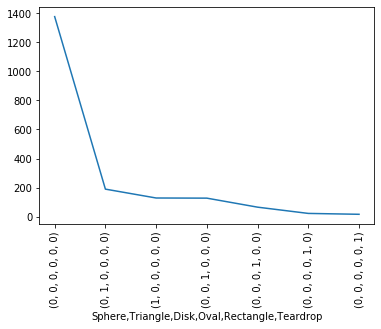

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


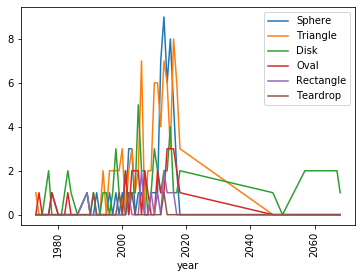

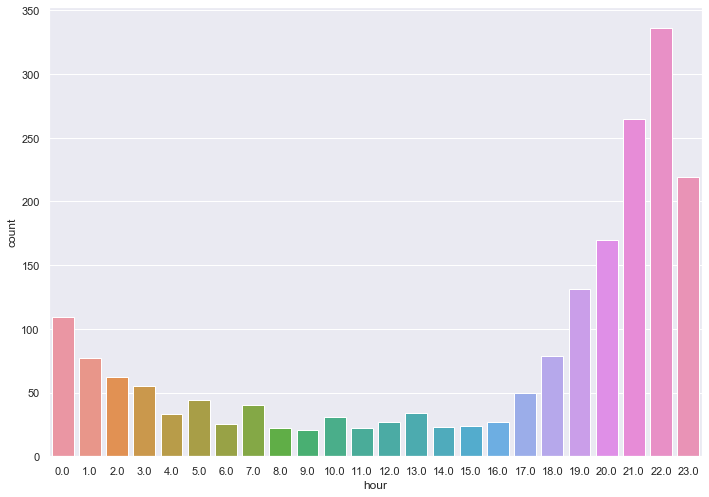

In [11]:
ufo_df[['Sphere','Triangle','Disk','Oval','Rectangle','Teardrop']].value_counts().plot()
plt.xticks(rotation=90)
plt.show()
filter=ufo_df['state_idaho']==1
grouped=ufo_df[filter].groupby(['year'])

by_year_counts=grouped['Sphere','Triangle','Disk','Oval','Rectangle','Teardrop'].sum()
by_year_counts.plot()
plt.xticks(rotation=90)
plt.show()
#print(ufo_df['hour'].value_counts())

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='hour', data=ufo_df)
plt.show()

In [12]:
#print(ufo_df.columns)
COLUMNS=['city','topic','year','hour','month','Disk','Chevron','Cigar','Circle','Cone','Cross','Cylinder','Diamond','Disk','Egg','Fireball','Flash','Formation','Light','Other','Oval','Rectangle','Sphere','Teardrop','Triangle','Unknown']
X=ufo_df[COLUMNS].replace(np.nan,0)
topic_dummies=pd.get_dummies(X['topic'])
city_dummies=pd.get_dummies(X['city'])
X=pd.concat([X,topic_dummies],axis=1)
X=pd.concat([X,city_dummies],axis=1)
X=X.drop(['topic','city'],axis=1)
#print(X.columns)
y=ufo_df['state_idaho']


X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
print("Most ufo sightings occur between 9pm and midnight")
print("K nearest neighbor accuracy ",knn.score(X_test,y_test))

Most ufo sightings occur between 9pm and midnight
K nearest neighbor accuracy  0.5693581780538303


In [13]:
print("Naive Bayes classification using summary text to determine state of idaho")
X=vec.fit_transform(ufo_df["summary"]).toarray()

y=ufo_df['state_idaho']
nb=MultinomialNB()
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)
nb.fit(X_train,y_train)
print("NB accuracy ",nb.score(X_test,y_test))

Naive Bayes classification using summary text to determine state of idaho
NB accuracy  0.650103519668737
